## Jupyter on Eagle

<img src="jup-logo.png" height=200 width=200>



HPC User Operations/Support

Presenter: Tim Thatcher

March 2021

## What is Jupyter?


**A web app for interactive Python in a browser** 

- "Live coding"
- Instant visualization
- Sharable
- Reproducible
- Customizable
- Now supports other languages besides Python (R, Julia..)   
    - https://github.com/jupyter/jupyter/wiki/Jupyter-kernels
    - these slides were created using Markdown in Jupyter!

<img src="sshot1.png">

<img src="sshot2.png">

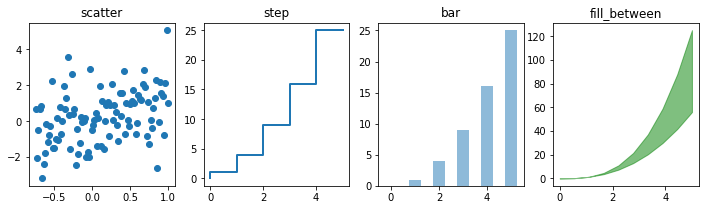

In [5]:
import chart_studio.plotly as py
import plotly.figure_factory as ff
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
x = np.linspace(0, 5, 10)
y = x ** 2
n = np.array([0,1,2,3,4,5])
xx = np.linspace(-0.75, 1., 100)

fig, axes = plt.subplots(1, 4, figsize=(12,3))

axes[0].scatter(xx, xx + 1.25*np.random.randn(len(xx)))
#axes[0].scatter(xx, xx + 0.25*np.random.randn(len(xx)))
axes[0].set_title("scatter")

axes[1].step(n, n**2.0, lw=2)
axes[1].set_title("step")

axes[2].bar(n, n**2, align="center", width=0.5, alpha=0.5)
axes[2].set_title("bar")

axes[3].fill_between(x, x**2.5, x**3, color="green", alpha=0.5);
axes[3].set_title("fill_between");

## Terminology - a Confusion of Words



### **Jupyterhub**
    * Multi-user "backend" server
    * Controls launching the single-user Jupyter server
    * NREL's "Europa" runs Jupyterhub
 
(In general, don't worry about JupyterHub--unless you're a sysadmin)

### **Jupyter/Jupyter Server/Notebook server**
    * The single-user server/web interface
    * Create/save/load .ipynb notebook files
    * What users generally interact with

### **Jupyter Notebook**
    * An individual .pynb file
    * Contains your Python code and visualizations
    * Sharable/downloadable

###  **Jupyter lab**
    * A "nicer" web interface for Jupyter - "notebooks 2.0"
    * Preferred by some
    * Lacking some features of "classic" notebooks

### **Kernel**
    * The Python environment used by a notebook
    * More on kernels later

## Using Jupyter at NREL

## Using Europa

We run a Jupyterhub server that is available. 

### Europa's Advantages:
    * Fast and easy access
    * Use regular Eagle credentials
    * Great for light to moderate processing/debugging/testing

### Europa's Disadvantages:
    * Limited resource: 8 cores/128GB RAM per user beefore automatic throttling
    * Compete with other users for CPU/RAM on a single machine
    * No custom environments (for now)

## Using Europa

### Simple Instructions:
    
    - Visit Europa at (https://europa.hpc.nrel.gov/)
    
    - Log in using your HPC credentials
     
    - Opens a standard "notebooks" interface
     
    - Change url end /tree to /lab for Lab interface


## Using a Compute Node

### Advantages:
    * Custom environments
    * 36 cores and up to ~750GB RAM
    * No competing with other users for cores

### Disadvantages:
    * Compete with other users for nodes
    * Costs AU
    
    


#### ...Is more than one node possible?

Yes... In part 2 of this talk, scheduled for Thursday, May 13th 10:00 - 11:00 AM Mountain Time

## Using a Compute Node - Hard Way

### Start on a login node:

`ssh eagle.hpc.nrel.gov`

`[user@el1:]$ srun -A <account> -t 02:00:00 --pty /bin/bash`





### When the job starts on the compute node:

`[user@r2i7n35]$ module load conda`

`source activate myjupenv`

`jupyter-notebook --no-browser --ip=$(hostname -s)`

note the node name (r2i7n35 in this example)

and the url, e.g. `http://127.0.0.1:8888/?token=<alphabet soup>`

### In a terminal on your computer:

`[user@laptop]$ ssh -N -L 8888:<nodename>:8888 username@eagle.hpc.nrel.gov`
    
copy full url from jupyter startup into your web browser. e.g.: 

`http://127.0.0.1:8888/?token=<alphabet soup>`


## Using a Compute Node - Easy Way


Automation makes life better!

###  Auto-launching with an sbatch script

https://github.com/NREL/HPC/tree/master/languages/python/jupyter


        

### Summary:
Full directions included in the git repo above.

Download `sbatch_jupyter.sh` and `auto_launch_jupyter.sh`

Edit sbatch_jupyter.sh to change:

`--account=*yourallocation*`

`--time=*timelimit*`

Run `auto_launch_jupyter.sh` and follow directions

That's it!

## Using a Login Node


Yes, you can run jupyter directly on a login node.



Should you run jupyter directly on a login node?



### Reasons to Not Run Jupyter Directly on a Login Node
    * Heavy lifting should be done via Europa or compute nodes
    * Using a highly shared resource (login nodes)
        * Competition for cycles
        * arbiter2 will throttle moderate to heavy usage

## Custom Conda Environments and Jupyter Kernels

https://github.com/NREL/HPC/tree/master/general/intermediate/Jupyterhub



### creating a conda environment:

`conda create -n myjupyter -c conda-forge jupyter ipykernel`

`source activate myjupyter`

`conda install -c conda-forge scipy numpy matplotlib`



### Add custom ipykernel

`python -m ipykernel install --user --name=myjupyter`

Restart your jupyter server

New kernel will appear in drop-down as an option

### Remove custom ipykernel

`jupyter kernelspec list`

`jupyter kernelspec remove myoldjupyter`


## Magic commands


Magic commands are "meta commands" that add extra functionality.

Magic commands begin with % or %%.

### A Few Useful Examples
 
    * %lsmagic - list all magic commands
    * %run _file.py_ - run an external python script
    * %%time - placed at top of cell, prints execution time
    * %who - list all defined variables in notebook
    


In [1]:
%lsmagic


Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %conda  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%

## Shell Commands

You can also run shell commands inside a cell. For example:

`!conda list` - see the packages installed in the environment you're using

In [7]:
!pwd
!ls

/home/tthatche/jup
auto_launch_jupyter.sh	  Jupyter Presentation.ipynb  slurm-6445885.out
geojsondemo.ipynb	  old			      sshot1.png
Interesting Graphs.ipynb  sbatch_jupyter.sh	      sshot2.png
jup-logo.png		  slurm


## Interesting/Useful Notebooks


### RISE Slides 
https://rise.readthedocs.io/en/stable/ - used for this presentation


### Awesome Jupyter 
https://github.com/markusschanta/awesome-jupyter

    
### Awesome Jupyterlab
https://github.com/mauhai/awesome-jupyterlab




### Other sample notebooks

https://github.com/jupyter/jupyter/wiki/A-gallery-of-interesting-Jupyter-Notebooks

https://nbviewer.jupyter.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-4-Matplotlib.ipynb

https://nbviewer.jupyter.org/github/gumption/Python_for_Data_Science/blob/master/Python_for_Data_Science_all.ipynb

https://nbviewer.jupyter.org/github/phelps-sg/python-bigdata/blob/master/src/main/ipynb/numerical-slides.ipynb

https://nbviewer.jupyter.org/github/Carreau/posts/blob/master/07-the-sound-of-hydrogen.ipynb

https://anaconda.org/jbednar/plotting_pitfalls/notebook

https://github.com/jupyterlab/jupyter-renderers/tree/master/packages/geojson-extension




## Upcoming Events


### HPC Office Hours – Jupyter Use Feedback Requested
Thursday, April 1st 11:00 - 12:00 PM Mountain

Jupyter usage has been growing on Eagle. In this special focused HPC Office Hours, we would like to hear from Jupyter users. How are you using Jupyter? Are there any pain points we can help with?  We are currently working on new ways to support Jupyter users at NREL and your input will help shape these efforts.



### HPC Workshop Series - Advanced Jupyter
Thursday, May 13th 10:00 - 11:00 AM Mountain

Beyond the basics. This advanced workshop will cover topics such as: slurm integrations, mulit-node parallel computations, JupyterLab Extensions, etc. Content for this workshop will be announced soon based on feedback received. If you cannot attend a feedback session listed above, please email suggestions or topics to HPC-Help@nrel.gov.

## Questions or Comments?


In [9]:

print("\n")
print("  _   _   ____    _____   _")
print(" | \ | | |  _ \  | ____| | |")
print(" |  \| | | |_) | |  _|   | |")
print(" | |\  | |  _ <  | |___  | |___")
print(" |_| \_| |_| \_\ |_____| |_____| \n")
                                
for i in range(0,5):
   print("     Thanks for attending!")




  _   _   ____    _____   _
 | \ | | |  _ \  | ____| | |
 |  \| | | |_) | |  _|   | |
 | |\  | |  _ <  | |___  | |___
 |_| \_| |_| \_\ |_____| |_____| 

     Thanks for attending!
     Thanks for attending!
     Thanks for attending!
     Thanks for attending!
     Thanks for attending!



## Happy Notebooking!
